# A look at crowdfunding

Kickstarter data here: https://webrobots.io/kickstarter-datasets/

Indiegogo data here: https://webrobots.io/indiegogo-dataset/

Remember the data checklist:

**What**

* Number of observations
* Definition of entities
* Missing data
* Activities of relevance for project

**Where**

* Geographical unit of analysis
* Geographical distribution

**When**

* Time coverage and trends




In [1]:
import random

In [2]:
def flatten_list(lol): 
    '''
    Flatten a list
    
    '''
    return([x for el in lol for x in el])

#Get sample

def sample_obs(data,field,sample_size,text_length):
    '''
    Samples observations from a dataset for sense-checking
    
    '''
    
    rel = list(data[field])
    
    out = random.sample(rel,sample_size)
    
    for s in out:
        print('====')
        print(s[:text_length])
        print('\n')


In [3]:
with open('../data/external/crowdfunding/Kickstarter_2018-10-18T03_20_48_880Z.json','r') as infile:
    k_json = [json.loads(line) for line in infile]

In [4]:
kdata = [obs['data'] for obs in k_json]

In [5]:
kdf = pd.DataFrame(kdata)

In [6]:
kdf.head()

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,1,Jozii is the premier service for full-time uni...,"{'id': 342, 'name': 'Web', 'slug': 'technology...",50,US,1413476386,"{'id': 69089661, 'name': 'AJ Smith and Brandon...",USD,$,True,...,jozii-college-jobs-made-easy,https://www.kickstarter.com/discover/categorie...,False,False,failed,1417150742,1.000000,{'web': {'project': 'https://www.kickstarter.c...,50.0,international
1,63,Dropsy is an adventure game with a focus on ex...,"{'id': 35, 'name': 'Video Games', 'slug': 'gam...",1613,US,1317217452,"{'id': 918042514, 'name': 'Jay Tholen', 'slug'...",USD,$,True,...,dropsy-a-different-take-on-the-old-school-adve...,https://www.kickstarter.com/discover/categorie...,True,True,successful,1320259153,1.000000,{'web': {'project': 'https://www.kickstarter.c...,1613.47,international
2,113,We've bought a press and already found a studi...,"{'id': 349, 'name': 'Letterpress', 'slug': 'pu...",6633,US,1403324529,"{'id': 1551377593, 'name': 'Camila and Daniela...",USD,$,True,...,letra-chueca-crooked-letter-a-printshop-and-bi...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1410502338,1.000000,{'web': {'project': 'https://www.kickstarter.c...,6633.0,international
3,1,"Premium, fashion sneaker brand intertwining hi...","{'id': 266, 'name': 'Footwear', 'slug': 'fashi...",1,GB,1457103832,"{'id': 1361409471, 'name': 'Ross Buckley', 'is...",GBP,£,False,...,high-end-premium-handmade-sneakers,https://www.kickstarter.com/discover/categorie...,False,False,failed,1462305856,1.407899,{'web': {'project': 'https://www.kickstarter.c...,1.40789944,international
4,99,Made in Europe from the finest quality leather...,"{'id': 266, 'name': 'Footwear', 'slug': 'fashi...",20654,CA,1423776567,"{'id': 456810610, 'name': 'Luigi Sardo', 'slug...",CAD,$,True,...,the-domenico-sneakerboot-by-luigi-sardo,https://www.kickstarter.com/discover/categorie...,True,False,successful,1429678899,0.782122,{'web': {'project': 'https://www.kickstarter.c...,19817.40571572,international


In [7]:
kdf.shape

(205696, 37)

There are around 205,000 projects

#### What is an entity here?

In [8]:
kdf.loc[0]

backers_count                                                               1
blurb                       Jozii is the premier service for full-time uni...
category                    {'id': 342, 'name': 'Web', 'slug': 'technology...
converted_pledged_amount                                                   50
country                                                                    US
created_at                                                         1413476386
creator                     {'id': 69089661, 'name': 'AJ Smith and Brandon...
currency                                                                  USD
currency_symbol                                                             $
currency_trailing_code                                                   True
current_currency                                                          USD
deadline                                                           1417150740
disable_communication                                           

An entity is a project. 

In [9]:
kdf['state'].value_counts()

successful    114158
failed         74951
canceled        8532
live            7438
suspended        617
Name: state, dtype: int64

This seems to include all projects in Kickstarter ever

In [10]:
kdf.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type'],
      dtype='object')

Some variables we will work with shortly:

* Category / blurb (to find activities related to health)
* Country / location (to analyse geography)
* launched at / created at // deadline / status (to measure trends and geography)

### Missing values

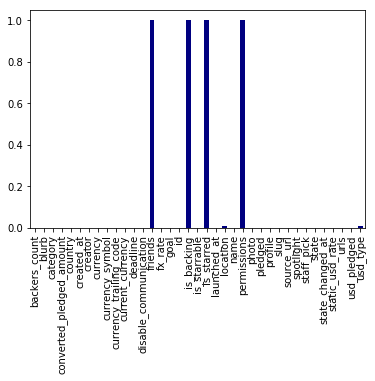

In [11]:
kdf.apply(lambda x: x.isna().mean(),axis=0).plot.bar(color='navy')

Few missing data

### Activities of relevance to the project.

In this case it would be projects that are about health or mention health

#### Check categories 

In [12]:
kdf['category'][0]

{'id': 342,
 'name': 'Web',
 'slug': 'technology/web',
 'position': 15,
 'parent_id': 16,
 'color': 6526716,
 'urls': {'web': {'discover': 'http://www.kickstarter.com/discover/categories/technology/web'}}}

We need to extract the categories from this field

In [13]:
kdf['category_value']=[x['name'] for x in kdf['category']]

In [14]:
kdf_cats = kdf.category_value.value_counts()

len(kdf_cats)

159

159 categories

(array([ 4.,  8.,  7., 21.,  6.,  6.,  5.,  5.,  4.,  9.,  3.,  4.,  6.,
         5.,  2.,  2.,  1.,  6.,  2.,  2.,  2.,  0.,  2.,  2.,  3.,  0.,
         1.,  2.,  9.,  6., 10.,  4.,  0.,  3.,  0.,  3.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([  18.  ,  103.98,  189.96,  275.94,  361.92,  447.9 ,  533.88,
         619.86,  705.84,  791.82,  877.8 ,  963.78, 1049.76, 1135.74,
        1221.72, 1307.7 , 1393.68, 1479.66, 1565.64, 1651.62, 1737.6 ,
        1823.58, 1909.56, 1995.54, 2081.52, 2167.5 , 2253.48, 2339.46,
        2425.44, 2511.42, 2597.4 , 2683.38, 2769.36, 2855.34, 2941.32,
        3027.3 , 3113.28, 3199.26, 3285.24, 3371.22, 3457.2 , 3543.18,
        3629.16, 3715.14, 3801.12, 3887.1 , 3973.08, 4059.06, 4145.04,
        4231.02, 4317.  ]),
 <a list of 50 Patch objects>)

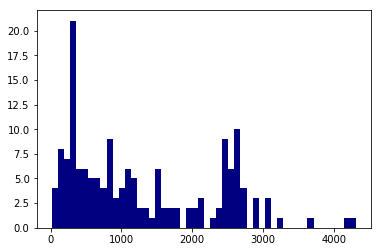

In [15]:
plt.hist(kdf_cats,bins=50,color='navy')

In [16]:
kdf_cats.head(n=10)

Web               4317
Product Design    4153
Tabletop Games    3636
Shorts            3204
Documentary       3108
Hardware          3067
Video Games       3035
Fiction           2895
Nonfiction        2883
Indie Rock        2860
Name: category_value, dtype: int64

In [17]:
'health' in list([x.lower() for x in kdf_cats.index])

False

No health category

#### Check blurbs

In [18]:
keywords = ['health','well-being','wellbeing']

In [19]:
#Nww boolean field for projects mentioning healthy stuff
kdf['healthy']= [any(x in text.lower() for x in keywords) for text in kdf.blurb]

In [20]:
kdf['healthy'].sum()

1955

1955 have the keyword

In [21]:
health_categories = pd.crosstab(kdf['category_value'],kdf['healthy']).sort_values(True,ascending=False)

health_categories[:10]

healthy,False,True
category_value,,
Restaurants,2302,143
Vegan,615,130
Food,2047,111
Drinks,2349,103
Small Batch,1945,100
Food Trucks,1858,97
Farms,1185,82
Web,4235,82
Cookbooks,560,60


Interesting mix

In [22]:
for x in health_categories.index[:15]:
    print(x)
    print('====')
    sample_obs(kdf.loc[(kdf.category_value==x) & (kdf.healthy==True)],'blurb',sample_size=2,text_length=500)
    

Restaurants
====
====
We are creating a healthy online food delivery service that brings people good food without the guilt straight to their door!


====
Avanzar Smoothies is opening a smoothie/juice bar in Queens, NY serving amazingly fresh frozen treats to promote health and well-being.


Vegan
====
====
Fruittyy is a vegan food truck.Our goal is to make healthy delicious food more accessible.We want to bring juices,and acai bowls to you


====
With a perfect combination of taste, health and convenience, our products provide an abundance of vitamins, minerals and antioxidants.


Food
====
====
R.N. Nuts, a sweet snack that's healthier than the status quo!


====
Planting healthy, useful trees, fruit trees and vegetables and creating clean water supply  for Lakota at Pine Ridge reservation.


Drinks
====
====
Village Tea Company is dedicated to providing a platform to promote healthy lifestyles through our brand of premium loose leaf tea.


====
100% Dill Pickle Brine. 100% Dilliciou

In [23]:
pd.crosstab(kdf['state'],kdf['healthy'])

healthy,False,True
state,,
canceled,8432,100
failed,73899,1052
live,7329,109
successful,113472,686
suspended,609,8


109 live health-related projects right now

### Where

In [24]:
pd.crosstab(kdf['country'],kdf['healthy']).sort_values(True,ascending=False)

healthy,False,True
country,,
US,160148,1441
GB,17585,213
CA,7594,105
AU,3941,53
NL,1503,22
DE,2109,20
SE,1002,13
HK,471,12
IT,1481,12


Almost exclusively developed countries

What are the healthiest cities? (in terms of kickstarter projects)

In [25]:
kdf['location'][0]

{'id': 12589342,
 'name': 'Manhattan',
 'slug': 'manhattan-ny',
 'short_name': 'Manhattan, NY',
 'displayable_name': 'Manhattan, NY',
 'localized_name': 'Manhattan',
 'country': 'US',
 'state': 'NY',
 'type': 'County',
 'is_root': False,
 'urls': {'web': {'discover': 'https://www.kickstarter.com/discover/places/manhattan-ny',
   'location': 'https://www.kickstarter.com/locations/manhattan-ny'},
  'api': {'nearby_projects': 'https://api.kickstarter.com/v1/discover?signature=1539904398.aae3553d1e62a16aac55da44ac8c71966f64bb86&woe_id=12589342'}}}

In [26]:
#Extract location value
kdf['location_value'] = [val['short_name'] if pd.isnull(val)==False else np.nan for val in kdf['location']]

In [27]:
health_cities = pd.crosstab(kdf['location_value'],kdf['healthy']).sort_values(True,ascending=False)[:30]

In [28]:
health_cities['ratio'] = health_cities.apply(lambda x: x[True]/x[False],axis=1)

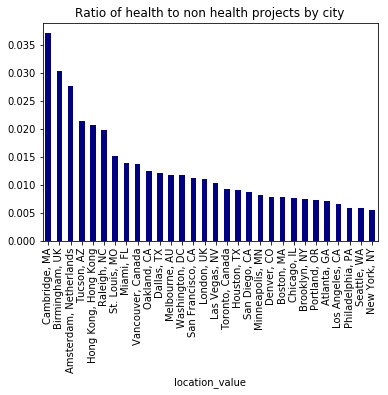

In [29]:
health_cities.sort_values('ratio',ascending=False)['ratio'].plot.bar(color='navy',title='Ratio of health to non health projects by city')

#### When?

In [30]:
# Date formats

kdf['created_year'] = [datetime.datetime.fromtimestamp(time).year for time in kdf['created_at']]

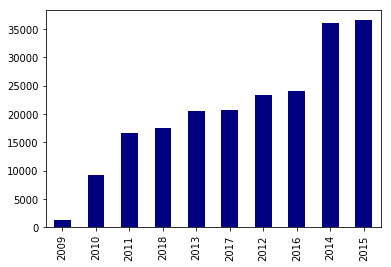

In [31]:
kdf['created_year'].value_counts().sort_values().plot.bar(color='navy')

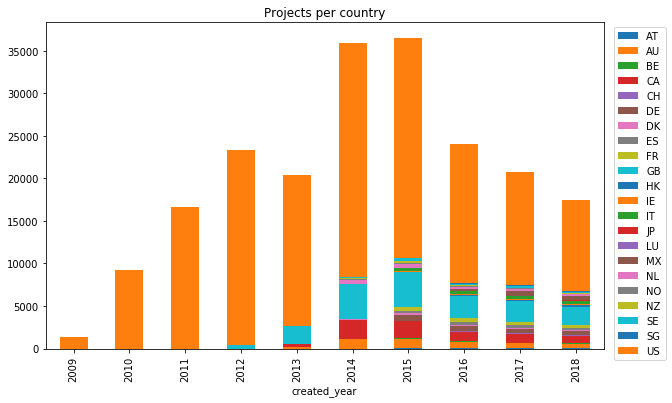

In [32]:
fig,ax = plt.subplots(figsize=(10,6))

pd.crosstab(kdf['country'],kdf['created_year']).T.plot.bar(stacked=True,ax=ax,title='Projects per country')
ax.legend(bbox_to_anchor=(1.01,1))

I hadn't realised that Kickstarter was declining! US is top orange, UK is blue, China is red) 

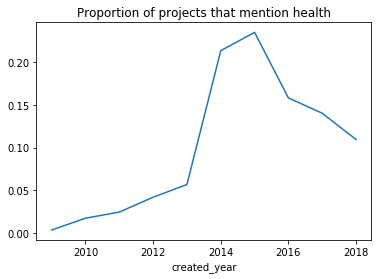

In [33]:
pd.crosstab(kdf['created_year'],kdf['healthy'],normalize=1)[True].plot(title='Proportion of projects that mention health')

We detect a decline in the proportion of projects that mention health since a peak of 2016. This could of course be driven by changes in the popularity of different categories

### Check tabletop games

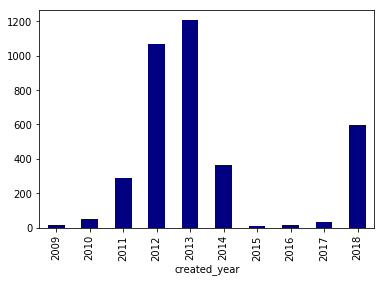

In [34]:
pd.crosstab(kdf['created_year'],kdf['category_value'])['Tabletop Games'].plot.bar(color='navy')